In [173]:
import os
import pandas as pd

In [174]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))

In [175]:
from src.tabulka import tabulka
from src.graf import graf

## Zformátování pro hezké výpisy

In [176]:
df['track_hezky'] = df.apply(lambda row: f"""{row['interpret_hlavni']}: {row['track'].split("(")[0]}""", axis=1)

In [177]:
df

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,track_hezky
0,100,CZ - RADIO - TOP 100,2006,1,2006-01,1,Hung Up,Madonna,Madonna,Warner Music,Madonna: Hung Up
1,101,CZ - RADIO - TOP 100,2006,1,2006-01,2,La camisa negra,Juanes,Juanes,Universal Music,Juanes: La camisa negra
2,102,CZ - RADIO - TOP 100,2006,1,2006-01,3,Push The Button,Sugababes,Sugababes,Universal Music,Sugababes: Push The Button
3,103,CZ - RADIO - TOP 100,2006,1,2006-01,4,Tripping,Robbie Williams,Robbie Williams,Warner Music,Robbie Williams: Tripping
4,104,CZ - RADIO - TOP 100,2006,1,2006-01,5,Hotel California,Victoria,Victoria,Universal Music,Victoria: Hotel California
...,...,...,...,...,...,...,...,...,...,...,...
90995,97195,CZ - RADIO - TOP 100,2023,43,2023-43,96,Friend For Life,X Ambassadors & Medium Build,X Ambassadors,Nan,X Ambassadors: Friend For Life
90996,97196,CZ - RADIO - TOP 100,2023,43,2023-43,97,SNAP,Rosa Linn,Rosa Linn,Sony Music,Rosa Linn: SNAP
90997,97197,CZ - RADIO - TOP 100,2023,43,2023-43,98,Without You,Tribbs,Tribbs,Nan,Tribbs: Without You
90998,97198,CZ - RADIO - TOP 100,2023,43,2023-43,99,Meltdown,Niall Horan,Niall Horan,Universal Music,Niall Horan: Meltdown


## Písně, které se točí v hodně letech, ale málo konkrétních týdnech

In [178]:
letnipisne = df[df['tyden'].isin([x for x in range(13,42)])]['track'].drop_duplicates().to_list()

In [179]:
vanocnipisne = df[(df['tyden'].isin([49,50,51,52,53]) & (~df['track'].isin(letnipisne)))].groupby(['track'])['rok'].nunique().nlargest(50)
vanocnipisne = vanocnipisne[vanocnipisne >= 2]
vanocnipisne

track
All I Want For Christmas Is You    11
Christmas Is All Around            11
Last Christmas                     11
Půlnoční                           11
Happy Xmas (War Is Over)           10
Sliby se maj plnit o Vánocích      10
Thank God It´s Christmas           10
Medvídek                            9
Na nebi svítí                       7
Do They Know It´s Christmas?        6
Sněhulák                            6
Vánoce na míru                      6
Christmas Lights                    4
Vánoční                             4
Jsou svátky                         3
Ledaco                              3
Ryba rybě                           3
Biela krása                         2
Bílý kraj                           2
Christmas Without You               2
Lover                               2
Merry Christmas                     2
Milióóóny přání                     2
Shake Up Christmas                  2
Tichá noc                           2
Tiché Gloria                        2
Vianoč

In [180]:
vanocnitracky = vanocnipisne.index.to_list()

In [228]:
vanocnipisne_hezky = df[(df['tyden'].isin([49,50,51,52,53]) & (~df['track'].isin(letnipisne)))].groupby(['track_hezky'])['rok'].nunique().nlargest(50)
vanocnipisne_hezky = vanocnipisne_hezky[vanocnipisne_hezky >= 6]
vanocnipisne_hezky = pd.DataFrame(vanocnipisne_hezky).reset_index().rename(columns={'track_hezky':'Píseň','rok':'Let v hitparádě'})
vanocnipisne_hezky

,Píseň,Let v hitparádě
0,Billy Mack: Christmas Is All Around,11
1,Mariah Carey: All I Want For Christmas Is You,11
2,Václav Neckář: Půlnoční,11
3,Wham!: Last Christmas,11
4,Janek Ledecký: Sliby se maj plnit o Vánocích,10
5,John Lennon: Happy Xmas,10
6,Queen: Thank God It´s Christmas,10
7,Lucie: Medvídek,9
8,Dan Bárta: Na nebi svítí,7
9,Band Aid Ii.: Do They Know It´s Christmas?,6


In [229]:
tabulka(vanocnipisne_hezky, titulek="Vánoční hitparádové stálice", podtitulek="Data od roku 2006, zdroj: ČNS IFPI")

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Vánoční hitparádové stálice</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Píseň</th><th class="text-nowrap">Let v hitparádě</th></tr></thead><tbody class="text-sm"><tr><td>Billy Mack: Christmas Is All Around</td><td>11</td></tr><tr><td>Mariah Carey: All I Want For Christmas Is You</td><td>11</td></tr><tr><td>Václav Neckář: Půlnoční</td><td>11</td></tr><tr><td>Wham!: Last Christmas</td><td>11</td></tr><tr><td>Janek Ledecký: Sliby se maj plnit o Vánocích</td><td>10</td></tr><tr><td>John Lennon: Happy Xmas</td><td>10</td></tr><tr><td>Queen: Thank God It´s Christmas</td><td>10</td></tr><tr><td>Lucie: Medvídek</td><td>9</td></tr><tr><td>Dan Bárta: Na nebi svítí</td><td>7</td></tr><tr><td>Band Aid Ii.: Do They Know It´s Christmas?</td><td>6</td></tr><tr><td>Ewa Farna: Vánoce na míru</td><td>6</td></tr><tr><td>Michal Hrůza: Sněhulák</td><td>6</td></tr></tbody><tfoot

## Písně, které mají Vánoce v názvu

In [182]:
df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates()

30598    Sliby se maj plnit o Vánocích
35665                      Vánoce bílý
56090             Vánoce hrajou glóriá
61089                   Vánoce na míru
81392                 Vánoce jako dřív
86494    O Vánocích (feat. Boni Pueri)
86695                Vánoce přicházejí
Name: track, dtype: object

In [183]:
df[df['track'].str.contains('Xmas')]['track'].drop_duplicates()

35676    Happy Xmas (War Is Over)
Name: track, dtype: object

In [184]:
df[df['track'].str.contains('Christm')]['track'].drop_duplicates()

10298                     Last Christmas
25250                 Shake Up Christmas
25475                   Christmas Lights
30377            Christmas Is All Around
30580    All I Want For Christmas Is You
35693           Thank God It´s Christmas
40778                    White Christmas
45638       Do They Know It´s Christmas?
50996           Merry Christmas Everyone
76351              Christmas Without You
81461                    Merry Christmas
Name: track, dtype: object

In [185]:
vanocevnazvu = df[df['track'].str.contains('Christm')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Xmas')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates().to_list() + df[df['track'].str.lower().str.contains('vánoč')]['track'].drop_duplicates().to_list()

In [186]:
vanocni = vanocevnazvu + vanocnitracky

In [187]:
vanocni

['Last Christmas',
 'Shake Up Christmas',
 'Christmas Lights',
 'Christmas Is All Around',
 'All I Want For Christmas Is You',
 'Thank God It´s Christmas',
 'White Christmas',
 'Do They Know It´s Christmas?',
 'Merry Christmas Everyone',
 'Christmas Without You',
 'Merry Christmas',
 'Happy Xmas (War Is Over)',
 'Sliby se maj plnit o Vánocích',
 'Vánoce bílý',
 'Vánoce hrajou glóriá',
 'Vánoce na míru',
 'Vánoce jako dřív',
 'O Vánocích (feat. Boni Pueri)',
 'Vánoce přicházejí',
 'Vánoční svařák',
 'Vánoční strom',
 'Vánoční přání',
 'Vánoční hymna',
 'Čas vánoční',
 'Vánoční fanatik',
 'Vánoční',
 'All I Want For Christmas Is You',
 'Christmas Is All Around',
 'Last Christmas',
 'Půlnoční',
 'Happy Xmas (War Is Over)',
 'Sliby se maj plnit o Vánocích',
 'Thank God It´s Christmas',
 'Medvídek',
 'Na nebi svítí',
 'Do They Know It´s Christmas?',
 'Sněhulák',
 'Vánoce na míru',
 'Christmas Lights',
 'Vánoční',
 'Jsou svátky',
 'Ledaco',
 'Ryba rybě',
 'Biela krása',
 'Bílý kraj',
 'Chris

## Kdy se to dostává do top 100

<Axes: xlabel='tyden'>

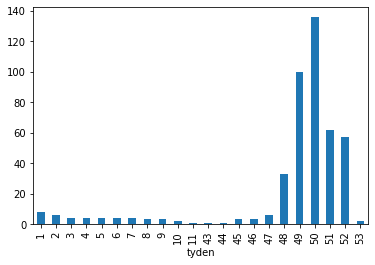

In [233]:
df[df['track'].isin(vanocni)].groupby("tyden").size().plot.bar()

In [237]:
vanocni_tydnove = [43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9,10,11]

In [238]:
cely_rok = df[df['track'].isin(vanocni)].groupby("tyden").size().reindex(vanocni_tydnove)

In [242]:
df[df['track'].isin(vanocni) & (df['tyden'] == 9)]

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,track_hezky
36674,36774,CZ - RADIO - TOP 100,2013,9,2013-09,75,Biela krása,No Name,No Name,Sony Music,No Name: Biela krása
46768,46868,CZ - RADIO - TOP 100,2015,9,2015-09,69,Sněhulák,Michal Hrůza,Michal Hrůza,Universal Music,Michal Hrůza: Sněhulák
72277,75077,CZ - RADIO - TOP 100,2020,9,2020-09,78,Lover,Taylor Swift,Taylor Swift,Universal Music,Taylor Swift: Lover


In [245]:
graf(sloupcovy=[cely_rok], target="vanoce_celorok", titulek='Ve kterých týdnech se vánoční hity dostávají do top 100', podtitulek=f'''Číslo na svislé ose udává celkový počet obsazených hitparádových příček od roku 2006. Do března v hitparádě vydržely Biela krása od No Name (2013), Sněhulák od Michala Hrůzy (2015) a Lover od Taylor Swift (2020). V roce 2023 začíná 48. týden 27. listopadu.''', kredity=["Zdroj dat: ČNS IFPI | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=True, osay=' ', osay2=' ', skladany=False, naopak=False, skrytnuly=True)

Graf uložen.


In [189]:
vsechnytydny = df['week'].drop_duplicates().to_list()

In [190]:
def cesta_pisne(seznam):
    pracovni = df
    pracovni = pracovni[(pracovni['track'].isin(seznam))].drop_duplicates(subset=['rok','tyden']).set_index("week", drop=True)
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni['pozice'].plot(figsize=(20,5)).invert_yaxis()

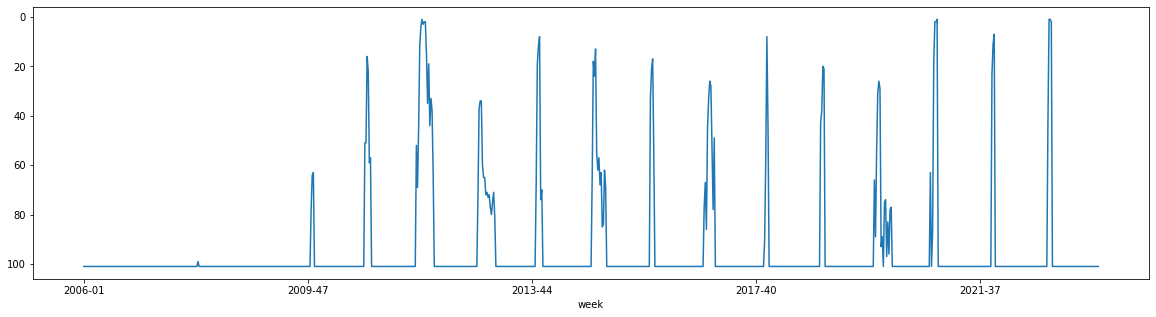

In [191]:
cesta_pisne(vanocni)

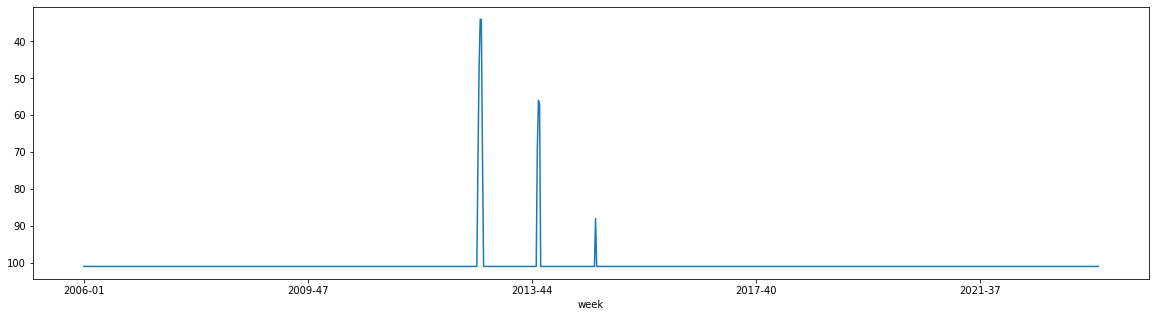

In [192]:
cesta_pisne(['Ledaco'])

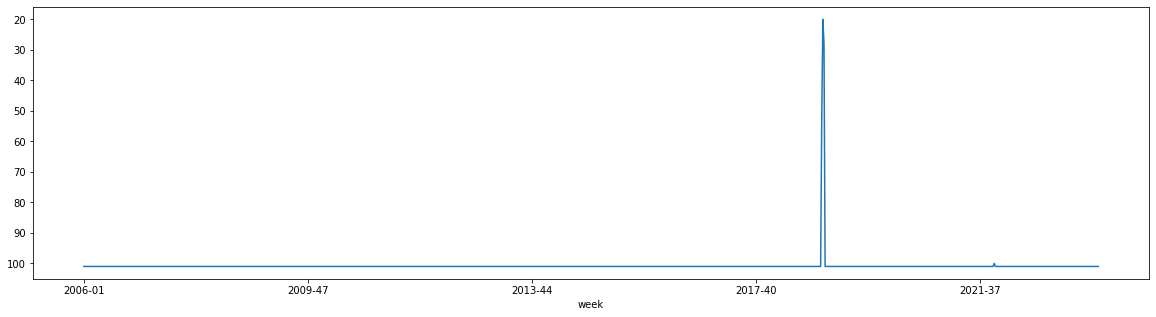

In [193]:
cesta_pisne(['Milióóóny přání'])

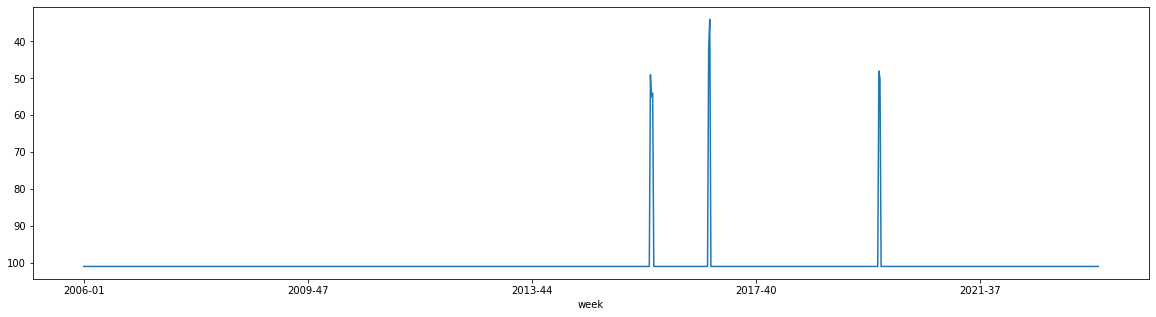

In [194]:
cesta_pisne(['Jsou svátky'])

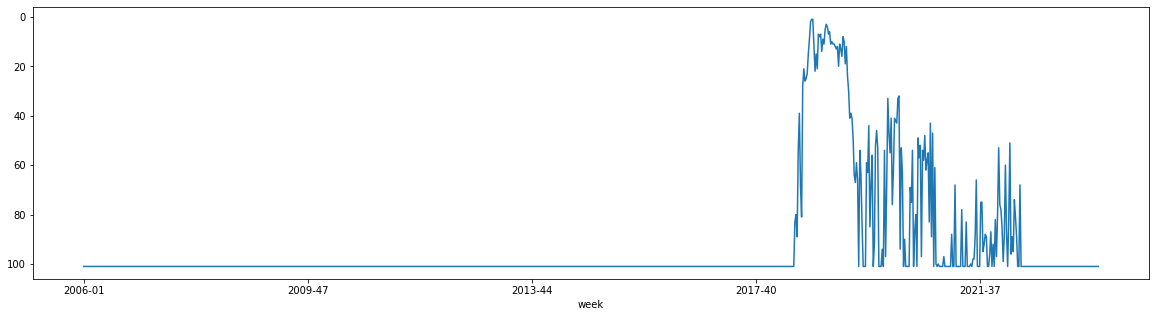

In [195]:
cesta_pisne(['Chci tančit'])

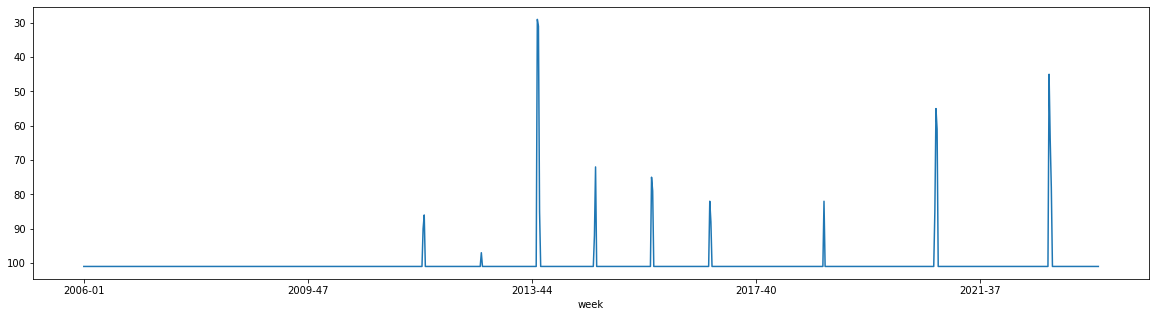

In [196]:
cesta_pisne(['Medvídek'])

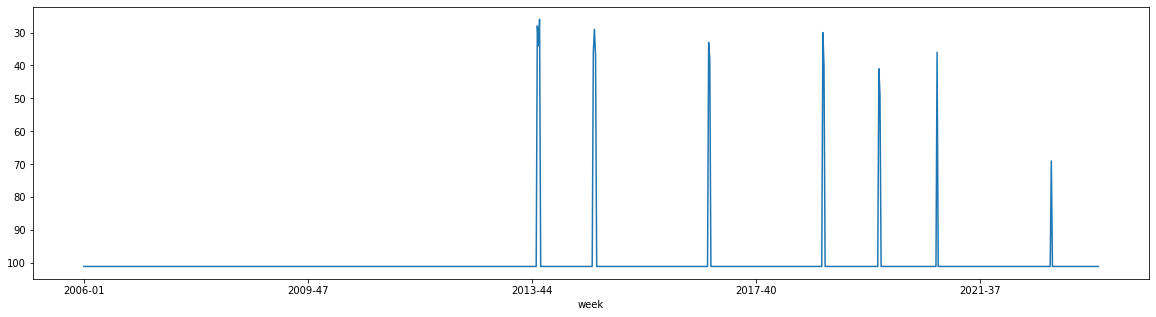

In [197]:
cesta_pisne(['Na nebi svítí'])

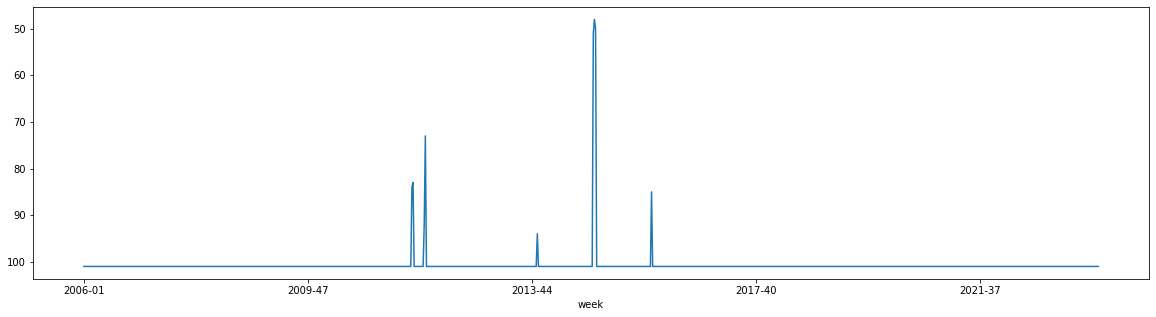

In [198]:
cesta_pisne(['Desatero'])

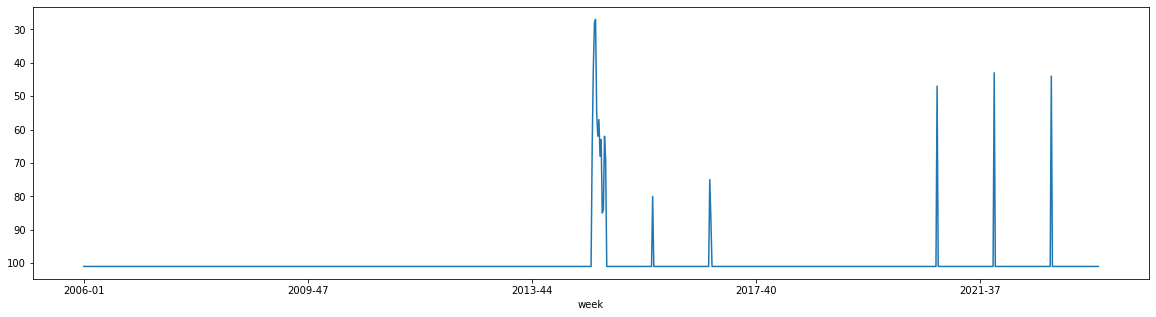

In [199]:
cesta_pisne(['Sněhulák'])

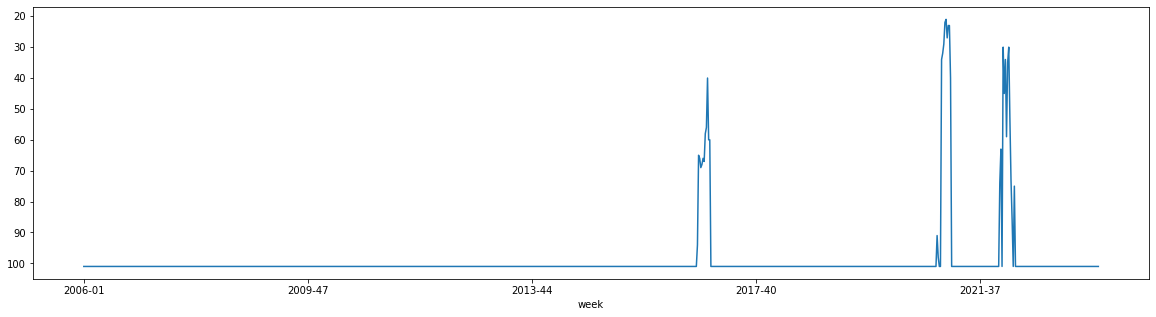

In [200]:
cesta_pisne(['Pouta'])

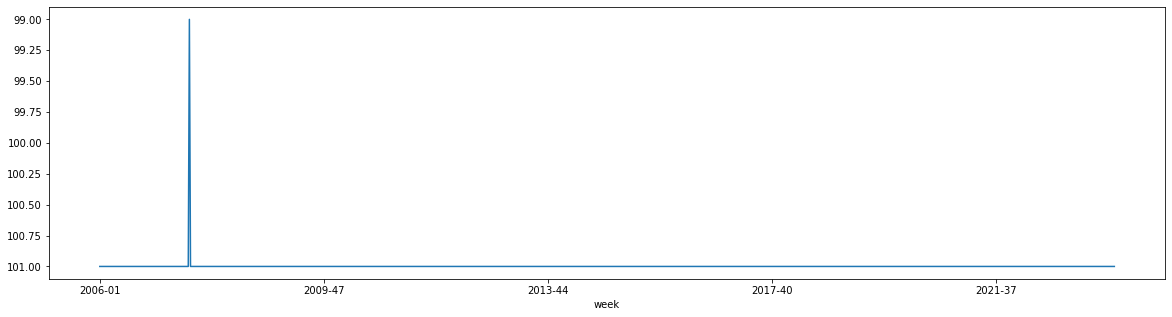

In [201]:
cesta_pisne(['Occhi'])

## Kdy nás ty tracky oblažily poprvé

In [202]:
df[df['track'].isin(vanocni)].groupby(['interpret','track'])['rok'].min().nsmallest(50)

interpret                          track                          
Wham!                              Last Christmas                     2008
Walda Gang                         Vánoční svařák                     2009
Coldplay                           Christmas Lights                   2010
Lucie Vondráčková                  Vánoční strom                      2010
Train                              Shake Up Christmas                 2010
Billy Mack                         Christmas Is All Around            2011
Mariah Carey                       All I Want For Christmas Is You    2011
Lucie Vondráčková Feat. R. Schwab  Vánoční přání                      2011
Václav Neckář & Umakart            Půlnoční                           2011
Lucie                              Medvídek                           2011
Janek Ledecký                      Sliby se maj plnit o Vánocích      2011
No Name                            Biela krása                        2012
Lucie Vondráčková & Kolář Petr   

## Český rozhlas

In [203]:
vanocni_l = [x.lower() for x in vanocni]

In [204]:
rz = pd.read_json(os.path.join("data","cro_raw.json"))

In [205]:
rz['since'] = rz['since'].apply(lambda x: x.replace("01:00","02:00"))

In [206]:
rz['den'] = pd.to_datetime(rz['since']).dt.dayofyear

In [207]:
rz['since']

0          2020-12-01T04:42:44+02:00
1          2020-12-08T18:25:47+02:00
2          2020-12-09T06:24:52+02:00
3          2020-12-10T18:05:36+02:00
4          2020-12-11T06:04:38+02:00
                     ...            
1067022    2023-10-21T11:56:56+02:00
1067023    2023-10-21T16:22:37+02:00
1067024    2023-10-22T13:53:15+02:00
1067025    2023-10-22T13:57:04+02:00
1067026    2023-10-22T23:26:45+02:00
Name: since, Length: 1067027, dtype: object

In [208]:
rz['datum'] = rz['since'].apply(lambda x: f"""{x[5:10]}""")

In [209]:
rz['track'] = rz['track'].apply(lambda x: x.lower())

In [210]:
rz[rz['track'].isin(vanocni_l)]

,since,id,interpret,interpret_id,track,track_id,stanice,den,datum
728,2020-12-01T07:04:55+02:00,10237476,KRYŠTOF & KAREL GOTT,25130,vánoční,84268,dvojka,336,12-01
745,2020-12-01T09:35:24+02:00,10238187,DAN BÁRTA,3192,na nebi svítí,12618,dvojka,336,12-01
765,2020-12-01T12:05:30+02:00,10238769,EWA FARNA,4499,vánoce na míru,46017,dvojka,336,12-01
820,2020-12-01T18:26:55+02:00,10240231,LUCIE VONDRÁČKOVÁ,3694,vánoční strom,15246,dvojka,336,12-01
835,2020-12-01T22:47:45+02:00,10240649,TOMÁŠ KLUS,3098,ledaco,14791,dvojka,336,12-01
...,...,...,...,...,...,...,...,...,...
976735,2022-12-26T12:21:07+02:00,16670206,BILLY MACK,5527,christmas is all around,15098,radiozurnal,360,12-26
976742,2022-12-26T13:34:36+02:00,16670805,LUCIE,3035,medvídek,12781,radiozurnal,360,12-26
976782,2022-12-26T18:35:20+02:00,16673046,DAVID DEYL & KRISTÍNA,31262,vánoční přání,104453,radiozurnal,360,12-26
976814,2022-12-26T22:17:13+02:00,16673583,GEORGE EZRA,8605,white christmas,46235,radiozurnal,360,12-26


In [211]:
vanocni_rz = rz[rz['track'].isin(vanocni_l)]

In [212]:
vanocni_rz.groupby('datum').size()

datum
01-01     1
01-04     1
01-07     2
01-09     1
01-12     2
         ..
12-26    81
12-27     2
12-29     1
12-30     2
12-31     3
Length: 98, dtype: int64

## Český rozhlas

In [213]:
cro = pd.read_json(os.path.join("data","cro_raw.json"))

In [214]:
cro['since'] = pd.to_datetime(cro['since'].apply(lambda x: x.replace("02:00","01:00")))

In [215]:
vanocni2 = [x.lower().split("(")[0] for x in vanocni]

In [216]:
cro.head()

,since,id,interpret,interpret_id,track,track_id,stanice
0,2020-12-01 04:42:44+01:00,10236811,"Samuel Ramey & London Philharmonic Orchestra, ...",24978,"Non piu andrai, árie z 1. dějství opery Figaro",83837,d
1,2020-12-08 18:25:47+01:00,10270691,"Samuel Ramey & London Philharmonic Orchestra, ...",24978,"Non piu andrai, árie z 1. dějství opery Figaro",83837,d
2,2020-12-09 06:24:52+01:00,10272302,"Samuel Ramey & London Philharmonic Orchestra, ...",24978,"Non piu andrai, árie z 1. dějství opery Figaro",83837,d
3,2020-12-10 18:05:36+01:00,10279719,Adam Plachetka & Symfonický Orchestr Českého R...,24977,"La calunnia e un venticello, árie z 1. dějství...",83835,d
4,2020-12-11 06:04:38+01:00,10281201,Adam Plachetka & Symfonický Orchestr Českého R...,24977,"La calunnia e un venticello, árie z 1. dějství...",83835,d


In [217]:
cro['track'] = cro['track'].apply(lambda x: x.lower().split("(")[0])

In [218]:
cro['datum'] = cro['since'].apply(lambda x: f"""{x.month:02}-{x.day:02}""")

In [219]:
vanocnidata = cro[cro['since'].dt.month >= 11]['datum'].sort_values().drop_duplicates().to_list()[23:]

In [220]:
vanocenacro = pd.Series(cro[(cro['track'].isin(vanocni2)) & (cro['since'].dt.year.isin([2021,2022])) & (cro['since'].dt.month > 9)].groupby('datum')['id'].nunique().reindex(vanocnidata).fillna(0), name="denní přehrání")

In [221]:
len(vanocni2)

55

In [222]:
graf(sloupcovy=[vanocenacro], target="vanoce_cro", titulek='Vánoční hity ve vysílání Českého rozhlasu', podtitulek=f'''Denní počty přehrání 55 vánočních skladeb, které od roku 2006 pronikly do týdenních žebříčků top 100 rádiových písní. Data z let 2021 a 2022.''', kredity=["Zdroj dat: IFPI a Český rozhlas | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=True, osay=' ', osay2=' ', skladany=False, naopak=False, skrytnuly=True)

Graf uložen.


In [223]:
cro[((cro['track'].str.lower().str.contains('vánoc',na=False)) | (cro['track'].str.lower().str.contains('christm',na=False))) & (cro['since'].dt.year.isin([2021,2022])) & (cro['since'].dt.month > 9)].groupby('datum')['id'].nunique().reindex(vanocnidata).fillna(0)

datum
11-24     1.0
11-25     1.0
11-26     0.0
11-27     0.0
11-28     9.0
11-29    13.0
11-30    15.0
12-01    14.0
12-02    10.0
12-03     9.0
12-04     7.0
12-05    29.0
12-06    34.0
12-07    34.0
12-08    32.0
12-09    32.0
12-10    23.0
12-11    14.0
12-12    43.0
12-13    64.0
12-14    42.0
12-15    44.0
12-16    15.0
12-17    14.0
12-18    14.0
12-19    14.0
12-20    78.0
12-21    75.0
12-22    74.0
12-23    70.0
12-24    69.0
12-25    65.0
12-26    59.0
12-27     0.0
12-28     2.0
12-29     2.0
12-30     2.0
12-31     0.0
Name: id, dtype: float64

In [224]:
cro[((cro['track'].str.lower().str.contains('kdepak ty',na=False))) & (cro['since'].dt.year.isin([2021,2022])) & (cro['since'].dt.month > 1)].groupby('datum')['id'].nunique()

datum
02-02    1
02-16    1
06-03    1
06-09    2
06-10    1
06-25    1
07-20    1
09-22    1
09-26    1
09-28    1
09-29    1
10-01    1
10-15    1
11-01    1
12-02    1
12-05    1
12-07    1
12-12    1
12-14    1
12-15    1
12-16    1
12-20    1
12-21    1
12-22    1
12-24    1
12-27    1
Name: id, dtype: int64

In [225]:
letni_tracky = cro[cro['since'].dt.month.isin([5,6,7,8])]['track'].drop_duplicates().to_list()

In [226]:
cro[(cro['since'].dt.month == 12) & (~cro['track'].isin(letni_tracky))].groupby('track')['id'].nunique().nlargest(60)

track
vánoční                                      124
all i want for christmas is you               85
vánoce na míru                                72
thank god it's christmas                      60
merry christmas                               59
vzácnej den                                   58
christmas time                                57
ryba rybě                                     56
vianočná                                      56
driving home for christmas                    54
na nebi svítí                                 54
sněhulák                                      52
do they know it's christmas                   48
merry christmas everyone                      44
bílý kraj                                     39
o vánocích                                    39
happy xmas                                    38
prokřehlá - vánoční                           38
so tell me…                                   38
bra3 - vánoční                                37
happy xmas    

In [227]:
cro[cro['since'].dt.month == 12].groupby('track')['id'].nunique() / cro[cro['since'].dt.month == 6].groupby('track')['id'].nunique()

track
                                                                                     0.935714
"33 ""god"""                                                                         1.800000
#metoo                                                                                    NaN
#toyland feat. marcus king, liv warfield, questlove & black thought _ 2021 single         NaN
$20                                                                                       NaN
                                                                                       ...   
žárlivost                                                                            2.333333
žárlím                                                                                    NaN
žít a nechat žít                                                                          NaN
žít jako kaskadér                                                                    1.500000
žízeň lásky                                           